# <font color=green>Part 1 - Building up a basic predictive model</font>

Load the dataset Manhattan12.csv into a pandas dataframe and carry out the following tasks.
Organise your code bearing in mind robustness and maintainability:

In [65]:
import numpy as np
import pandas as pd
import string
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer

## <font color=blue>1. Data cleaning and transformation: </font>

### <div class="alert alert-info">Show the shape of the dataset</div>

In [2]:
df = pd.read_csv('Manhattan12.csv', encoding = "ISO-8859-1")

In [3]:
df.shape

(27399, 21)

In [4]:
df.head()#check the outlook of data.

,ï»¿Manhattan Rolling Sales File. All Sales From August 2012 - August 2013.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 08/30/2013 Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Neighborhood Name 09/06/13, Descriptive Data i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013


In [5]:
#The first 3 line shows nothing.

In [6]:
df = df.drop(range(3))
df.head()# check again

,ï»¿Manhattan Rolling Sales File. All Sales From August 2012 - August 2013.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
5,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
6,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
7,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013


### <div class="alert alert-info">Rename incorrectly formatted column names (e.g. SALE\nPRICE)</div>

In [7]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [8]:
df.head()

3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
5,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
6,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
7,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
8,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013


In [9]:
df.columns = [x.replace("\n", " ") for x in df.columns.to_list()]
# 

In [10]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART MENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
5,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
6,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
7,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
8,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2170,400,,V1,44 FAIRVIEW AVENUE,,...,0,0,0,"16,217",0,0,4,V1,$0,29/04/2013
27395,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,75,,V1,BENNETT AVENUE,,...,0,0,0,"4,150",0,0,4,V1,"$495,000",26/06/2013
27396,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,75,,V1,BENNETT AVENUE,,...,0,0,0,"4,150",0,0,4,V1,$0,02/04/2013
27397,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,76,,V1,N/A MAGAW PLACE,,...,0,0,0,760,0,0,4,V1,$0,26/06/2013


### <div class="alert alert-info">Create list of categorical variables and another for the numerical variables</div>

<font color='red'>
    Please read the following information before continue, thank you</font>
<font color='green'> 
    In this part, some of the data is number only, but it won't make since to find outlier or calculate. for example, the zip code and Block number, in many situations. In this CW, the house's price and size may affect each other. Although, the location will affect the price of the house, but due to its high repeatability and subjective coding method (zip code and address information written by the government or staff), the traditional data method is not suitable for these data. For example, it doesn't make sense to do a look-ahead analysis of the zip code, or a box plot.
    When we try to classify the data, we classify zip code, block, lot, into numerical simply because they are numbers. We don't claim to calculate them.</font>
    <font color='red'>
    need to explan why unit, lot, and sale date are in categorical, espasaly after we put build date into numerical. </font>

In [11]:
df.dtypes

BOROUGH                           object
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                             object
LOT                               object
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APART MENT NUMBER                 object
ZIP CODE                          object
RESIDENTIAL UNITS                 object
COMMERCIAL UNITS                  object
TOTAL UNITS                       object
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                        object
TAX CLASS AT TIME OF SALE         object
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [12]:
df_categorical = df[['NEIGHBORHOOD','BUILDING CLASS CATEGORY', "TAX CLASS AT PRESENT", "BUILDING CLASS AT PRESENT", "ADDRESS", "APART MENT NUMBER", "BUILDING CLASS AT TIME OF SALE", "TAX CLASS AT TIME OF SALE","EASE-MENT","BLOCK",'ZIP CODE','LOT','BOROUGH', "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS" , "SALE DATE"]]
df_categorical

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,APART MENT NUMBER,BUILDING CLASS AT TIME OF SALE,TAX CLASS AT TIME OF SALE,EASE-MENT,BLOCK,ZIP CODE,LOT,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE DATE
4,,13 CONDOS - ELEVATOR APARTMENTS,,,345 WEST 14TH STREET,,R4,2,,738,10014,1306,1,0,0,0,20/05/2013
5,,13 CONDOS - ELEVATOR APARTMENTS,,,345 WEST 14TH STREET,,R4,2,,738,10014,1307,1,0,0,0,16/05/2013
6,,13 CONDOS - ELEVATOR APARTMENTS,,,345 WEST 14TH STREET,,R4,2,,738,10014,1308,1,0,0,0,23/05/2013
7,,13 CONDOS - ELEVATOR APARTMENTS,,,345 WEST 14TH STREET,,R4,2,,738,10014,1309,1,0,0,0,15/05/2013
8,,13 CONDOS - ELEVATOR APARTMENTS,,,345 WEST 14TH STREET,,R4,2,,738,10014,1310,1,0,0,0,13/05/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,V1,44 FAIRVIEW AVENUE,,V1,4,,2170,10040,400,1,0,0,0,29/04/2013
27395,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,V1,BENNETT AVENUE,,V1,4,,2180,10033,75,1,0,0,0,26/06/2013
27396,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,V1,BENNETT AVENUE,,V1,4,,2180,10033,75,1,0,0,0,02/04/2013
27397,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,V1,N/A MAGAW PLACE,,V1,4,,2180,10033,76,1,0,0,0,26/06/2013


In [13]:
df_numerical = df[["LAND SQUARE FEET", "GROSS SQUARE FEET", "SALE PRICE", "YEAR BUILT"]]
df_numerical

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,YEAR BUILT
4,0,0,"$2,214,693",0
5,0,0,"$1,654,656",0
6,0,0,"$1,069,162",0
7,0,0,"$1,374,637",0
8,0,0,"$1,649,565",0
...,...,...,...,...
27394,"16,217",0,$0,0
27395,"4,150",0,"$495,000",0
27396,"4,150",0,$0,0
27397,760,0,$0,0


### <div class="alert alert-info">For each numerical column, remove the ',' the '$' for the sale price, and then convert them to numeric.</div>

In [14]:
df_numerical = df_numerical.replace(',','', regex=True)
df_numerical["SALE PRICE"] = df_numerical["SALE PRICE"].replace({'\$':''}, regex = True)
df_numerical = df_numerical.apply(pd.to_numeric, errors='coerce', axis=1)
df_numerical

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,YEAR BUILT
4,0,0,2214693,0
5,0,0,1654656,0
6,0,0,1069162,0
7,0,0,1374637,0
8,0,0,1649565,0
...,...,...,...,...
27394,16217,0,0,0
27395,4150,0,495000,0
27396,4150,0,0,0
27397,760,0,0,0


In [15]:
df_numerical.dtypes

LAND SQUARE FEET     int64
GROSS SQUARE FEET    int64
SALE PRICE           int64
YEAR BUILT           int64
dtype: object

In [16]:
is_numeric_dtype(df_categorical['BOROUGH'])

False

### <div class="alert alert-info">Convert the 'SALE DATE' to datetime</div>

In [17]:
df_categorical["SALE DATE"] = pd.to_datetime(df_categorical["SALE DATE"])

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '20/05/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16/05/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '23/05/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Par

In [18]:
df_categorical.dtypes

NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APART MENT NUMBER                         object
BUILDING CLASS AT TIME OF SALE            object
TAX CLASS AT TIME OF SALE                 object
EASE-MENT                                 object
BLOCK                                     object
ZIP CODE                                  object
LOT                                       object
BOROUGH                                   object
RESIDENTIAL UNITS                         object
COMMERCIAL UNITS                          object
TOTAL UNITS                               object
SALE DATE                         datetime64[ns]
dtype: object

### <div class="alert alert-info">For each categorical variable, remove the spaces, and then replace the empty string '' by NaN.</div>

In [19]:
df_categorical = df_categorical.replace(' ','', regex=True)
df_categorical = df_categorical.replace(r'^\s*$', np.nan, regex=True)
df_categorical

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,APART MENT NUMBER,BUILDING CLASS AT TIME OF SALE,TAX CLASS AT TIME OF SALE,EASE-MENT,BLOCK,ZIP CODE,LOT,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE DATE
4,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2,NaN,738,10014,1306,1,0,0,0,2013-05-20
5,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2,NaN,738,10014,1307,1,0,0,0,2013-05-16
6,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2,NaN,738,10014,1308,1,0,0,0,2013-05-23
7,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2,NaN,738,10014,1309,1,0,0,0,2013-05-15
8,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2,NaN,738,10014,1310,1,0,0,0,2013-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,44FAIRVIEWAVENUE,NaN,V1,4,NaN,2170,10040,400,1,0,0,0,2013-04-29
27395,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,NaN,V1,4,NaN,2180,10033,75,1,0,0,0,2013-06-26
27396,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,NaN,V1,4,NaN,2180,10033,75,1,0,0,0,2013-02-04
27397,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,N/AMAGAWPLACE,NaN,V1,4,NaN,2180,10033,76,1,0,0,0,2013-06-26


### <div class="alert alert-info">Replace the zeros in Prices, Land squares, etc. by NaN</div>

In [20]:
df_numerical = df_numerical.replace(0, np.nan)
df_numerical

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,YEAR BUILT
4,NaN,NaN,2214693.0,NaN
5,NaN,NaN,1654656.0,NaN
6,NaN,NaN,1069162.0,NaN
7,NaN,NaN,1374637.0,NaN
8,NaN,NaN,1649565.0,NaN
...,...,...,...,...
27394,16217.0,NaN,NaN,NaN
27395,4150.0,NaN,495000.0,NaN
27396,4150.0,NaN,NaN,NaN
27397,760.0,NaN,NaN,NaN


In [21]:
df_categorical = df_categorical.replace("", np.nan)
df_categorical = df_categorical.replace("0", np.nan)

df_categorical

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,APART MENT NUMBER,BUILDING CLASS AT TIME OF SALE,TAX CLASS AT TIME OF SALE,EASE-MENT,BLOCK,ZIP CODE,LOT,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE DATE
4,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2,NaN,738,10014,1306,1,NaN,NaN,NaN,2013-05-20
5,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2,NaN,738,10014,1307,1,NaN,NaN,NaN,2013-05-16
6,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2,NaN,738,10014,1308,1,NaN,NaN,NaN,2013-05-23
7,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2,NaN,738,10014,1309,1,NaN,NaN,NaN,2013-05-15
8,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2,NaN,738,10014,1310,1,NaN,NaN,NaN,2013-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,44FAIRVIEWAVENUE,NaN,V1,4,NaN,2170,10040,400,1,NaN,NaN,NaN,2013-04-29
27395,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,NaN,V1,4,NaN,2180,10033,75,1,NaN,NaN,NaN,2013-06-26
27396,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,NaN,V1,4,NaN,2180,10033,75,1,NaN,NaN,NaN,2013-02-04
27397,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,N/AMAGAWPLACE,NaN,V1,4,NaN,2180,10033,76,1,NaN,NaN,NaN,2013-06-26


### <div class="alert alert-info">Show a summary of all missing values as well as the summary statistics</div>

In [22]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27395 entries, 4 to 27398
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LAND SQUARE FEET   4489 non-null   float64
 1   GROSS SQUARE FEET  4326 non-null   float64
 2   SALE PRICE         19802 non-null  float64
 3   YEAR BUILT         20954 non-null  float64
dtypes: float64(4)
memory usage: 856.2 KB


In [23]:
df_numerical.value_counts()

LAND SQUARE FEET  GROSS SQUARE FEET  SALE PRICE   YEAR BUILT
7532.0            112850.0           57900.0      2007.0        272
                                     58900.0      2007.0         88
                                     42400.0      2007.0         80
                                     112905.0     2007.0         20
                                     48205.0      2007.0         19
                                                               ... 
2250.0            9150.0             4750000.0    1900.0          1
2248.0            6956.0             4900000.0    1926.0          1
                  4730.0             5750000.0    1910.0          1
                  1938.0             250000.0     1901.0          1
213650.0          940000.0           540829842.0  1933.0          1
Length: 1989, dtype: int64

In [24]:
df_numerical.describe()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,YEAR BUILT
count,4489.000000,4.326000e+03,1.980200e+04,20954.000000
mean,5893.466028,6.061620e+04,2.556609e+06,1953.080557
std,7884.729624,8.111694e+04,1.916295e+07,37.692641
min,200.000000,2.530000e+02,1.000000e+00,1000.000000
25%,2104.000000,6.198500e+03,3.676662e+05,1920.000000
50%,5046.000000,2.337150e+04,7.400000e+05,1955.000000
75%,7532.000000,1.128500e+05,1.627399e+06,1987.000000
max,213650.000000,1.970736e+06,1.307965e+09,2013.000000


In [25]:
df_numerical.corr()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,YEAR BUILT
LAND SQUARE FEET,1.000000,0.739576,0.382177,0.246777
GROSS SQUARE FEET,0.739576,1.000000,0.469032,0.562680
SALE PRICE,0.382177,0.469032,1.000000,-0.028839
YEAR BUILT,0.246777,0.562680,-0.028839,1.000000


array([[<AxesSubplot:title={'center':'LAND SQUARE FEET'}>,
        <AxesSubplot:title={'center':'GROSS SQUARE FEET'}>],
       [<AxesSubplot:title={'center':'SALE PRICE'}>,
        <AxesSubplot:title={'center':'YEAR BUILT'}>]], dtype=object)

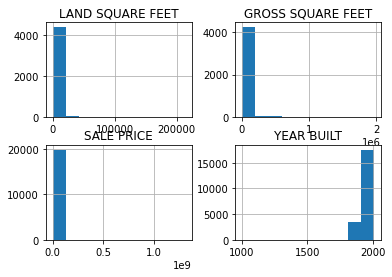

In [26]:
df_numerical.hist()

### <div class="alert alert-info">Drop the columns 'BOROUGH', 'EASE-MENT', 'APARTMENT NUMBER'</div>

In [27]:
df_categorical = df_categorical.drop(["BOROUGH"], axis='columns')
df_categorical = df_categorical.drop(["APART MENT NUMBER", "EASE-MENT"], axis='columns')
df_categorical

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,BUILDING CLASS AT TIME OF SALE,TAX CLASS AT TIME OF SALE,BLOCK,ZIP CODE,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE DATE
4,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,R4,2,738,10014,1306,NaN,NaN,NaN,2013-05-20
5,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,R4,2,738,10014,1307,NaN,NaN,NaN,2013-05-16
6,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,R4,2,738,10014,1308,NaN,NaN,NaN,2013-05-23
7,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,R4,2,738,10014,1309,NaN,NaN,NaN,2013-05-15
8,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,R4,2,738,10014,1310,NaN,NaN,NaN,2013-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,44FAIRVIEWAVENUE,V1,4,2170,10040,400,NaN,NaN,NaN,2013-04-29
27395,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,V1,4,2180,10033,75,NaN,NaN,NaN,2013-06-26
27396,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,V1,4,2180,10033,75,NaN,NaN,NaN,2013-02-04
27397,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,N/AMAGAWPLACE,V1,4,2180,10033,76,NaN,NaN,NaN,2013-06-26


### <div class="alert alert-info">Drop duplicates if any</div>

In [28]:
df_categorical = df_categorical.drop_duplicates(keep = False)
df_numerical = df_numerical.drop_duplicates(keep = False)

In [29]:
df_categorical

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,BUILDING CLASS AT TIME OF SALE,TAX CLASS AT TIME OF SALE,BLOCK,ZIP CODE,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE DATE
4,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,R4,2,738,10014,1306,NaN,NaN,NaN,2013-05-20
5,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,R4,2,738,10014,1307,NaN,NaN,NaN,2013-05-16
6,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,R4,2,738,10014,1308,NaN,NaN,NaN,2013-05-23
7,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,R4,2,738,10014,1309,NaN,NaN,NaN,2013-05-15
8,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,R4,2,738,10014,1310,NaN,NaN,NaN,2013-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,44FAIRVIEWAVENUE,V1,4,2170,10040,400,NaN,NaN,NaN,2013-04-29
27395,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,V1,4,2180,10033,75,NaN,NaN,NaN,2013-06-26
27396,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,V1,4,2180,10033,75,NaN,NaN,NaN,2013-02-04
27397,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,N/AMAGAWPLACE,V1,4,2180,10033,76,NaN,NaN,NaN,2013-06-26


In [30]:
df_numerical

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,YEAR BUILT
5,NaN,NaN,1654656.0,NaN
6,NaN,NaN,1069162.0,NaN
7,NaN,NaN,1374637.0,NaN
8,NaN,NaN,1649565.0,NaN
9,NaN,NaN,1705568.0,NaN
...,...,...,...,...
27391,3100.0,NaN,690000.0,NaN
27393,1582.0,NaN,185000.0,NaN
27394,16217.0,NaN,NaN,NaN
27395,4150.0,NaN,495000.0,NaN


### <div class="alert alert-info">Drop rows with NaN values</div>

In [31]:
df_categorical = df_categorical.dropna()
df_numerical = df_numerical.dropna()

In [32]:
df_categorical

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,BUILDING CLASS AT TIME OF SALE,TAX CLASS AT TIME OF SALE,BLOCK,ZIP CODE,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE DATE
24,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2B,C7,303EAST4THSTREET,C7,2,374,10009,1,8,2,10,2013-05-02
28,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2B,C7,17AVENUEB,C7,2,385,10009,1,7,1,8,2013-04-18
30,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2,C7,14AVENUEB,C7,2,397,10009,33,25,2,27,2013-01-31
31,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2B,C7,174EAST2NDSTREET,C7,2,398,10009,52,9,1,10,2013-07-01
32,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2B,C7,174EAST2NDSTREET,C7,2,398,10009,52,9,1,10,2012-10-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27063,WASHINGTONHEIGHTSUPPER,07RENTALS-WALKUPAPARTMENTS,2,C7,4321BROADWAY,C7,2,2180,10033,120,69,5,74,2013-11-04
27064,WASHINGTONHEIGHTSUPPER,08RENTALS-ELEVATORAPARTMENTS,2,D7,440AUDUBONAVENUE,D7,2,2158,10040,16,68,3,71,2012-08-29
27067,WASHINGTONHEIGHTSUPPER,08RENTALS-ELEVATORAPARTMENTS,2,D7,100ARDENSTREET,D7,2,2175,10040,27,55,8,63,2012-03-12
27068,WASHINGTONHEIGHTSUPPER,08RENTALS-ELEVATORAPARTMENTS,2,D7,4720BROADWAY,D7,2,2175,10040,33,50,2,52,2013-05-30


In [33]:
df_numerical

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,YEAR BUILT
22,2381.0,3084.0,3150000.0,1899.0
25,2426.0,9345.0,3650000.0,1900.0
26,2726.0,13002.0,895250.0,1910.0
28,2093.0,5852.0,283.0,1997.0
29,2164.0,9071.0,3500000.0,1900.0
...,...,...,...,...
27379,7900.0,6438.0,7300000.0,1925.0
27380,10000.0,20000.0,1500000.0,1991.0
27382,17275.0,34570.0,5183000.0,1927.0
27386,15000.0,2465.0,12000000.0,1971.0


### <div class="alert alert-info">Identify and remove outliers if any</div>

### <div class="alert alert-info">Show the shape of the resulting dataframe</div>

In [34]:
df_categorical.shape

(728, 14)

In [35]:
df_numerical.shape

(1879, 4)

### <div class="alert alert-info">Consider the log of the prices and normalise the data</div>

## <font color=blue>2. Data Exploration</font>

### <div class="alert alert-info">Visualise the prices across neighborhood</div>

<font color= red> need to explan why add price at the end of categorical chart. why we do the index. how does join work </font>

In [36]:
df_numerical.index.names = ['Index']
df_categorical.index.names = ['Index']
extracted_col = df_numerical["SALE PRICE"]
df_price_neighbourhood = df_categorical.join(extracted_col)
df_price_neighbourhood.dropna(how='any', inplace=True)
df_price_neighbourhood

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,BUILDING CLASS AT TIME OF SALE,TAX CLASS AT TIME OF SALE,BLOCK,ZIP CODE,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE DATE,SALE PRICE
Index,,,,,,,,,,,,,,,
28,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2B,C7,17AVENUEB,C7,2,385,10009,1,7,1,8,2013-04-18,283.0
30,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2,C7,14AVENUEB,C7,2,397,10009,33,25,2,27,2013-01-31,13185684.0
34,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2,C7,170EAST2NDSTREET,C7,2,398,10009,53,36,3,39,2012-10-26,3810602.0
35,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2B,C4,203EAST4THSTREET,C4,2,400,10009,56,10,1,10,2013-09-04,7333333.0
36,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2B,C4,201EAST4THSTREET,C4,2,400,10009,57,9,1,9,2013-09-04,7333333.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27061,WASHINGTONHEIGHTSUPPER,07RENTALS-WALKUPAPARTMENTS,2,C7,500FTWASHINGTONAVENUE,C7,2,2180,10033,13,56,1,57,2013-03-22,8620000.0
27063,WASHINGTONHEIGHTSUPPER,07RENTALS-WALKUPAPARTMENTS,2,C7,4321BROADWAY,C7,2,2180,10033,120,69,5,74,2013-11-04,11400000.0
27064,WASHINGTONHEIGHTSUPPER,08RENTALS-ELEVATORAPARTMENTS,2,D7,440AUDUBONAVENUE,D7,2,2158,10040,16,68,3,71,2012-08-29,7810000.0


In [37]:
df_neighbourhoodPrice = df_price_neighbourhood[['NEIGHBORHOOD', "SALE PRICE"]].copy()
df_neighbourhoodPrice

,NEIGHBORHOOD,SALE PRICE
Index,,
28,ALPHABETCITY,283.0
30,ALPHABETCITY,13185684.0
34,ALPHABETCITY,3810602.0
35,ALPHABETCITY,7333333.0
36,ALPHABETCITY,7333333.0
...,...,...
27061,WASHINGTONHEIGHTSUPPER,8620000.0
27063,WASHINGTONHEIGHTSUPPER,11400000.0
27064,WASHINGTONHEIGHTSUPPER,7810000.0


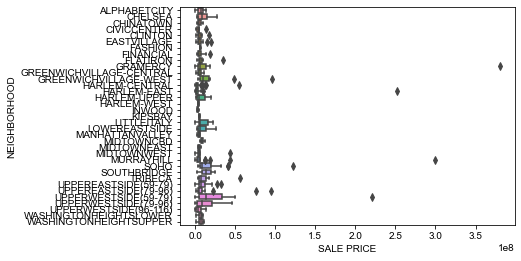

In [38]:
sns.boxplot(x="SALE PRICE", y="NEIGHBORHOOD", data= df_neighbourhoodPrice)
sns.set(rc={'figure.figsize':(60,60)})
plt.show()

### <div class="alert alert-info">Visualise the prices over time</div>

In [39]:
df_priceTime = df_price_neighbourhood[['SALE DATE', "SALE PRICE"]].copy()


In [40]:
df_priceTime

,SALE DATE,SALE PRICE
Index,,
28,2013-04-18,283.0
30,2013-01-31,13185684.0
34,2012-10-26,3810602.0
35,2013-09-04,7333333.0
36,2013-09-04,7333333.0
...,...,...
27061,2013-03-22,8620000.0
27063,2013-11-04,11400000.0
27064,2012-08-29,7810000.0


In [41]:
df_priceTime.sort_values(by='SALE DATE', inplace = True) 

In [42]:
df_priceTime

,SALE DATE,SALE PRICE
Index,,
6279,2012-01-08,1050000.0
25248,2012-01-08,12375000.0
2128,2012-01-08,635000.0
26348,2012-01-10,10.0
25247,2012-01-10,10.0
...,...,...
4905,2013-12-02,1050000.0
7649,2013-12-04,19100000.0
19436,2013-12-04,100000.0


<AxesSubplot:xlabel='SALE DATE', ylabel='SALE PRICE'>

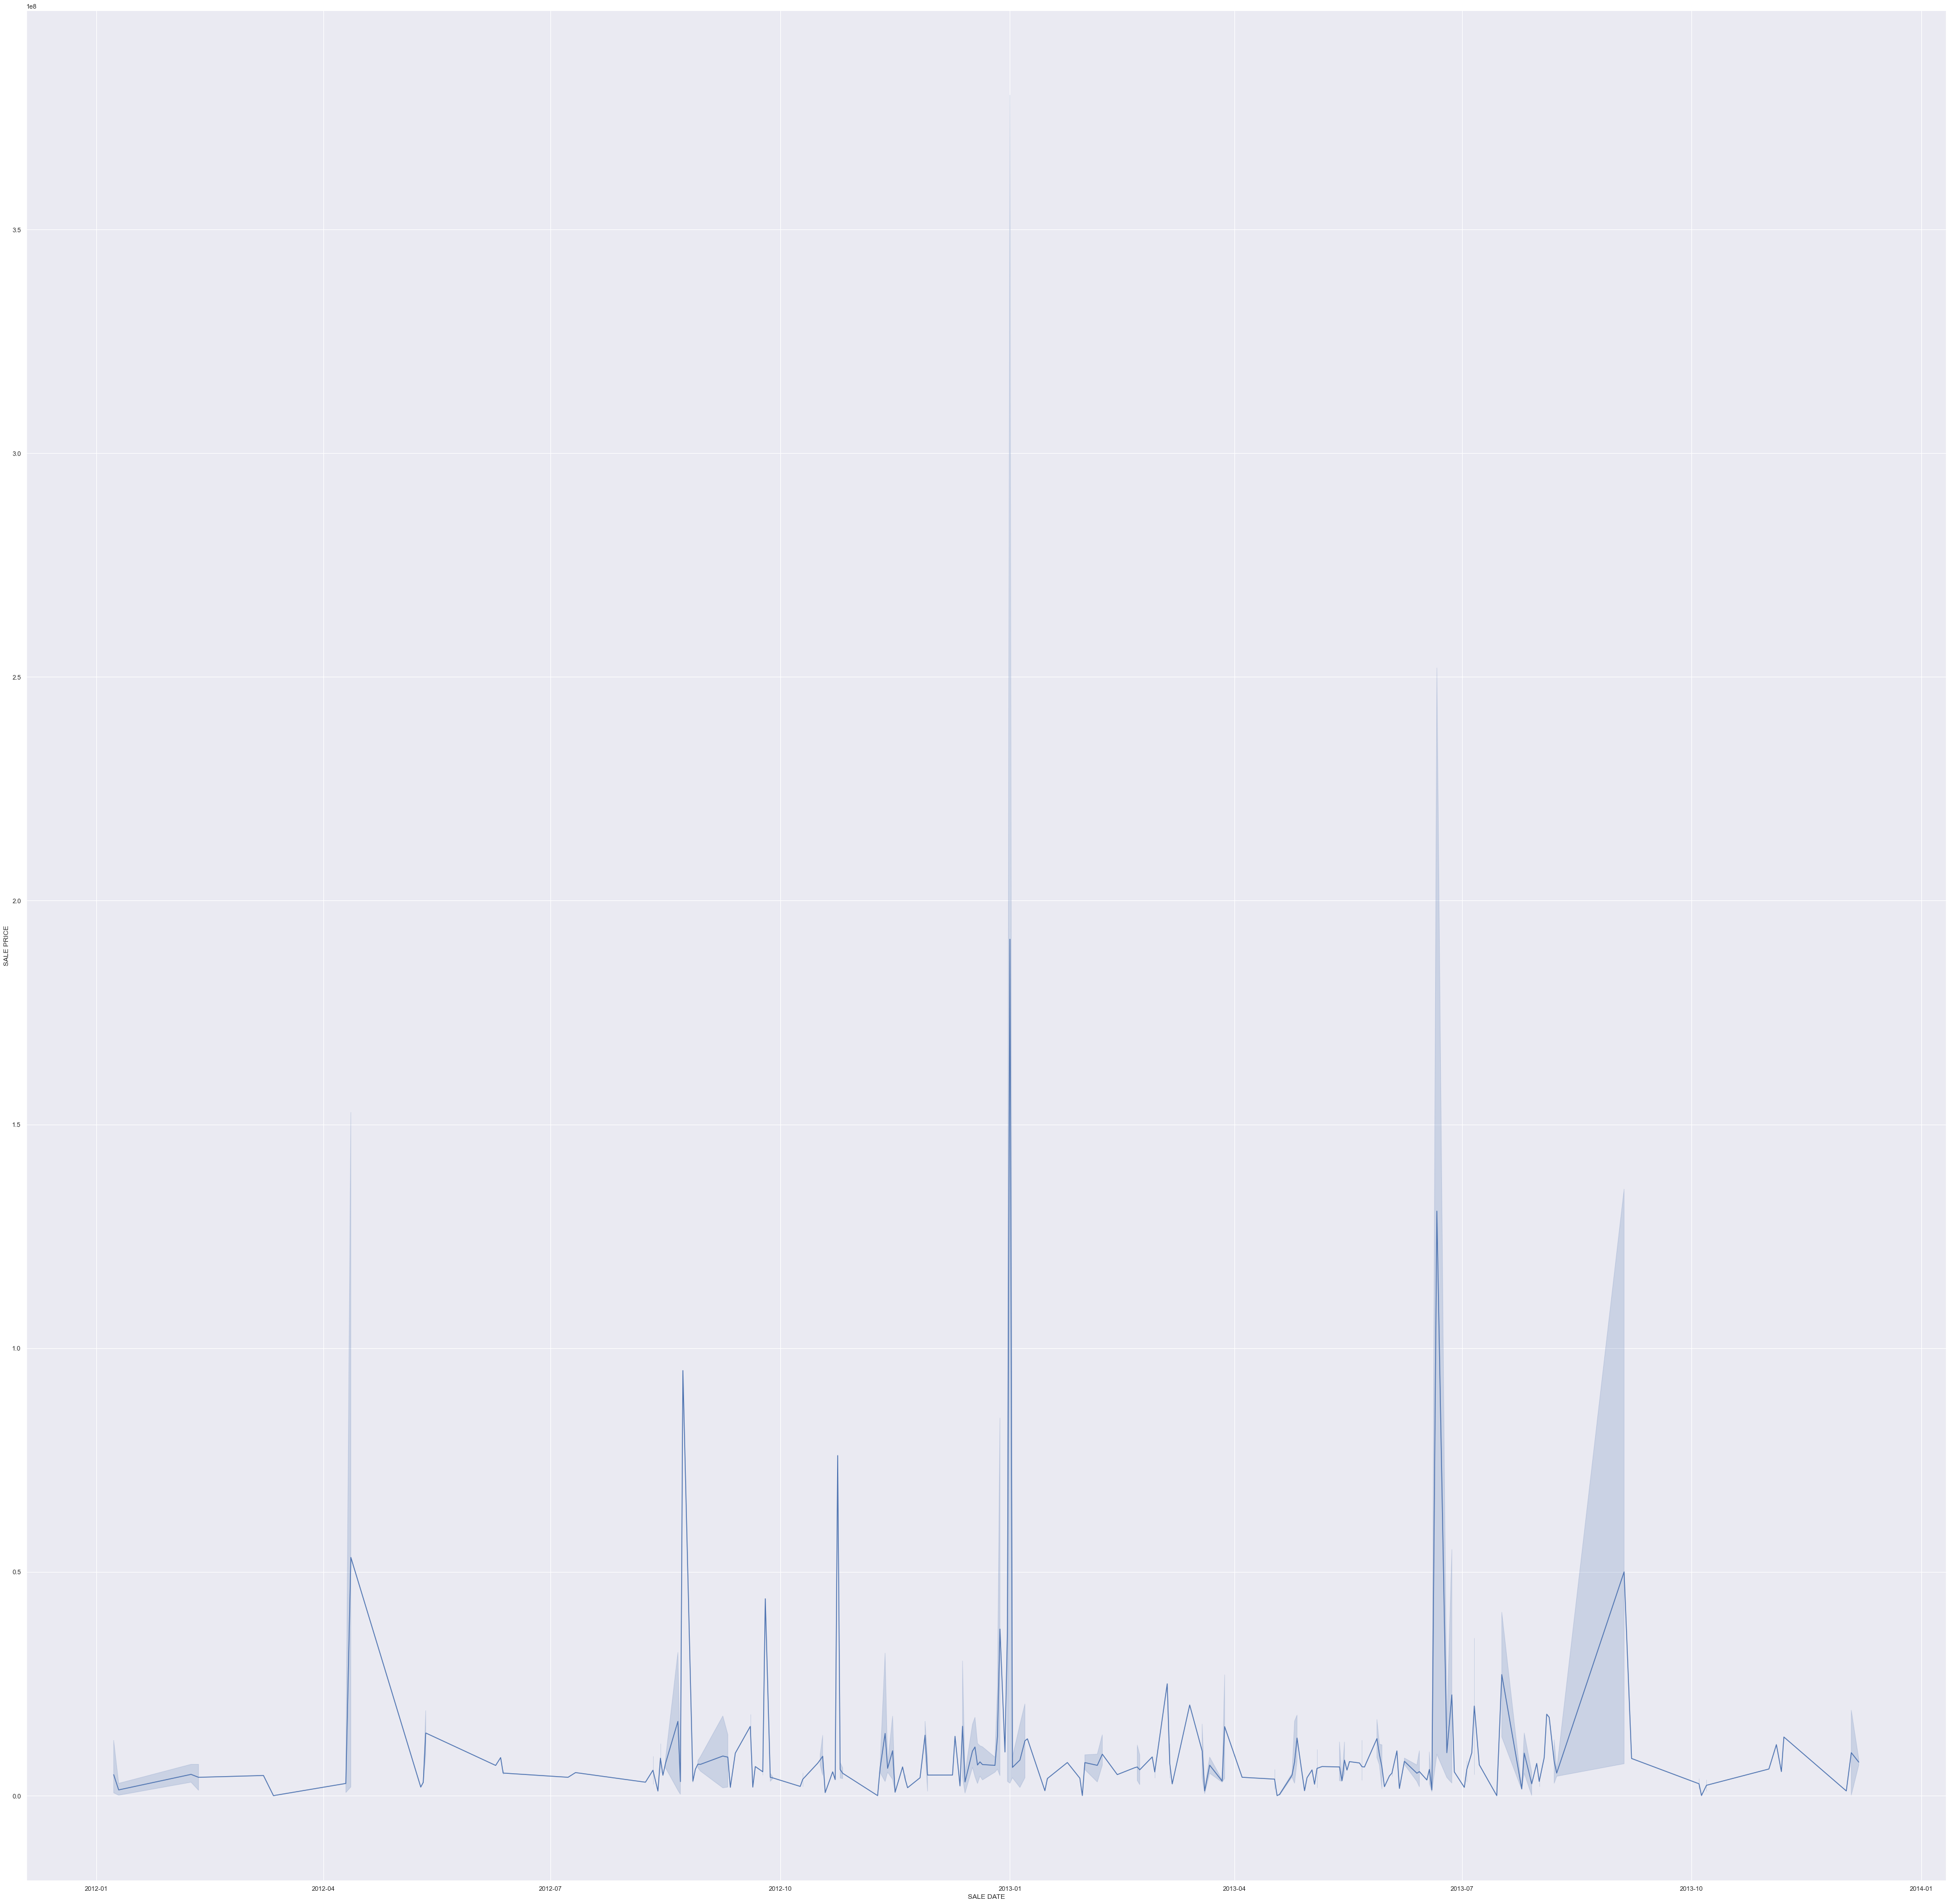

In [43]:
sns.lineplot(data=df_priceTime, x="SALE DATE", y="SALE PRICE")



In [44]:
df_priceTimeAge = df_numerical[['YEAR BUILT', "SALE PRICE"]].copy()
df_priceTimeAge

,YEAR BUILT,SALE PRICE
Index,,
22,1899.0,3150000.0
25,1900.0,3650000.0
26,1910.0,895250.0
28,1997.0,283.0
29,1900.0,3500000.0
...,...,...
27379,1925.0,7300000.0
27380,1991.0,1500000.0
27382,1927.0,5183000.0


In [45]:
df_priceTimeAge.sort_values(by='YEAR BUILT', inplace = True)

In [46]:
df_priceTimeAge

,YEAR BUILT,SALE PRICE
Index,,
17138,1800.0,6500000.0
996,1877.0,10405882.0
16363,1880.0,15190000.0
25220,1880.0,5400000.0
5706,1890.0,503249.0
...,...,...
5991,2012.0,1.0
5990,2012.0,1260000.0
5988,2012.0,3410000.0


<AxesSubplot:xlabel='YEAR BUILT', ylabel='SALE PRICE'>

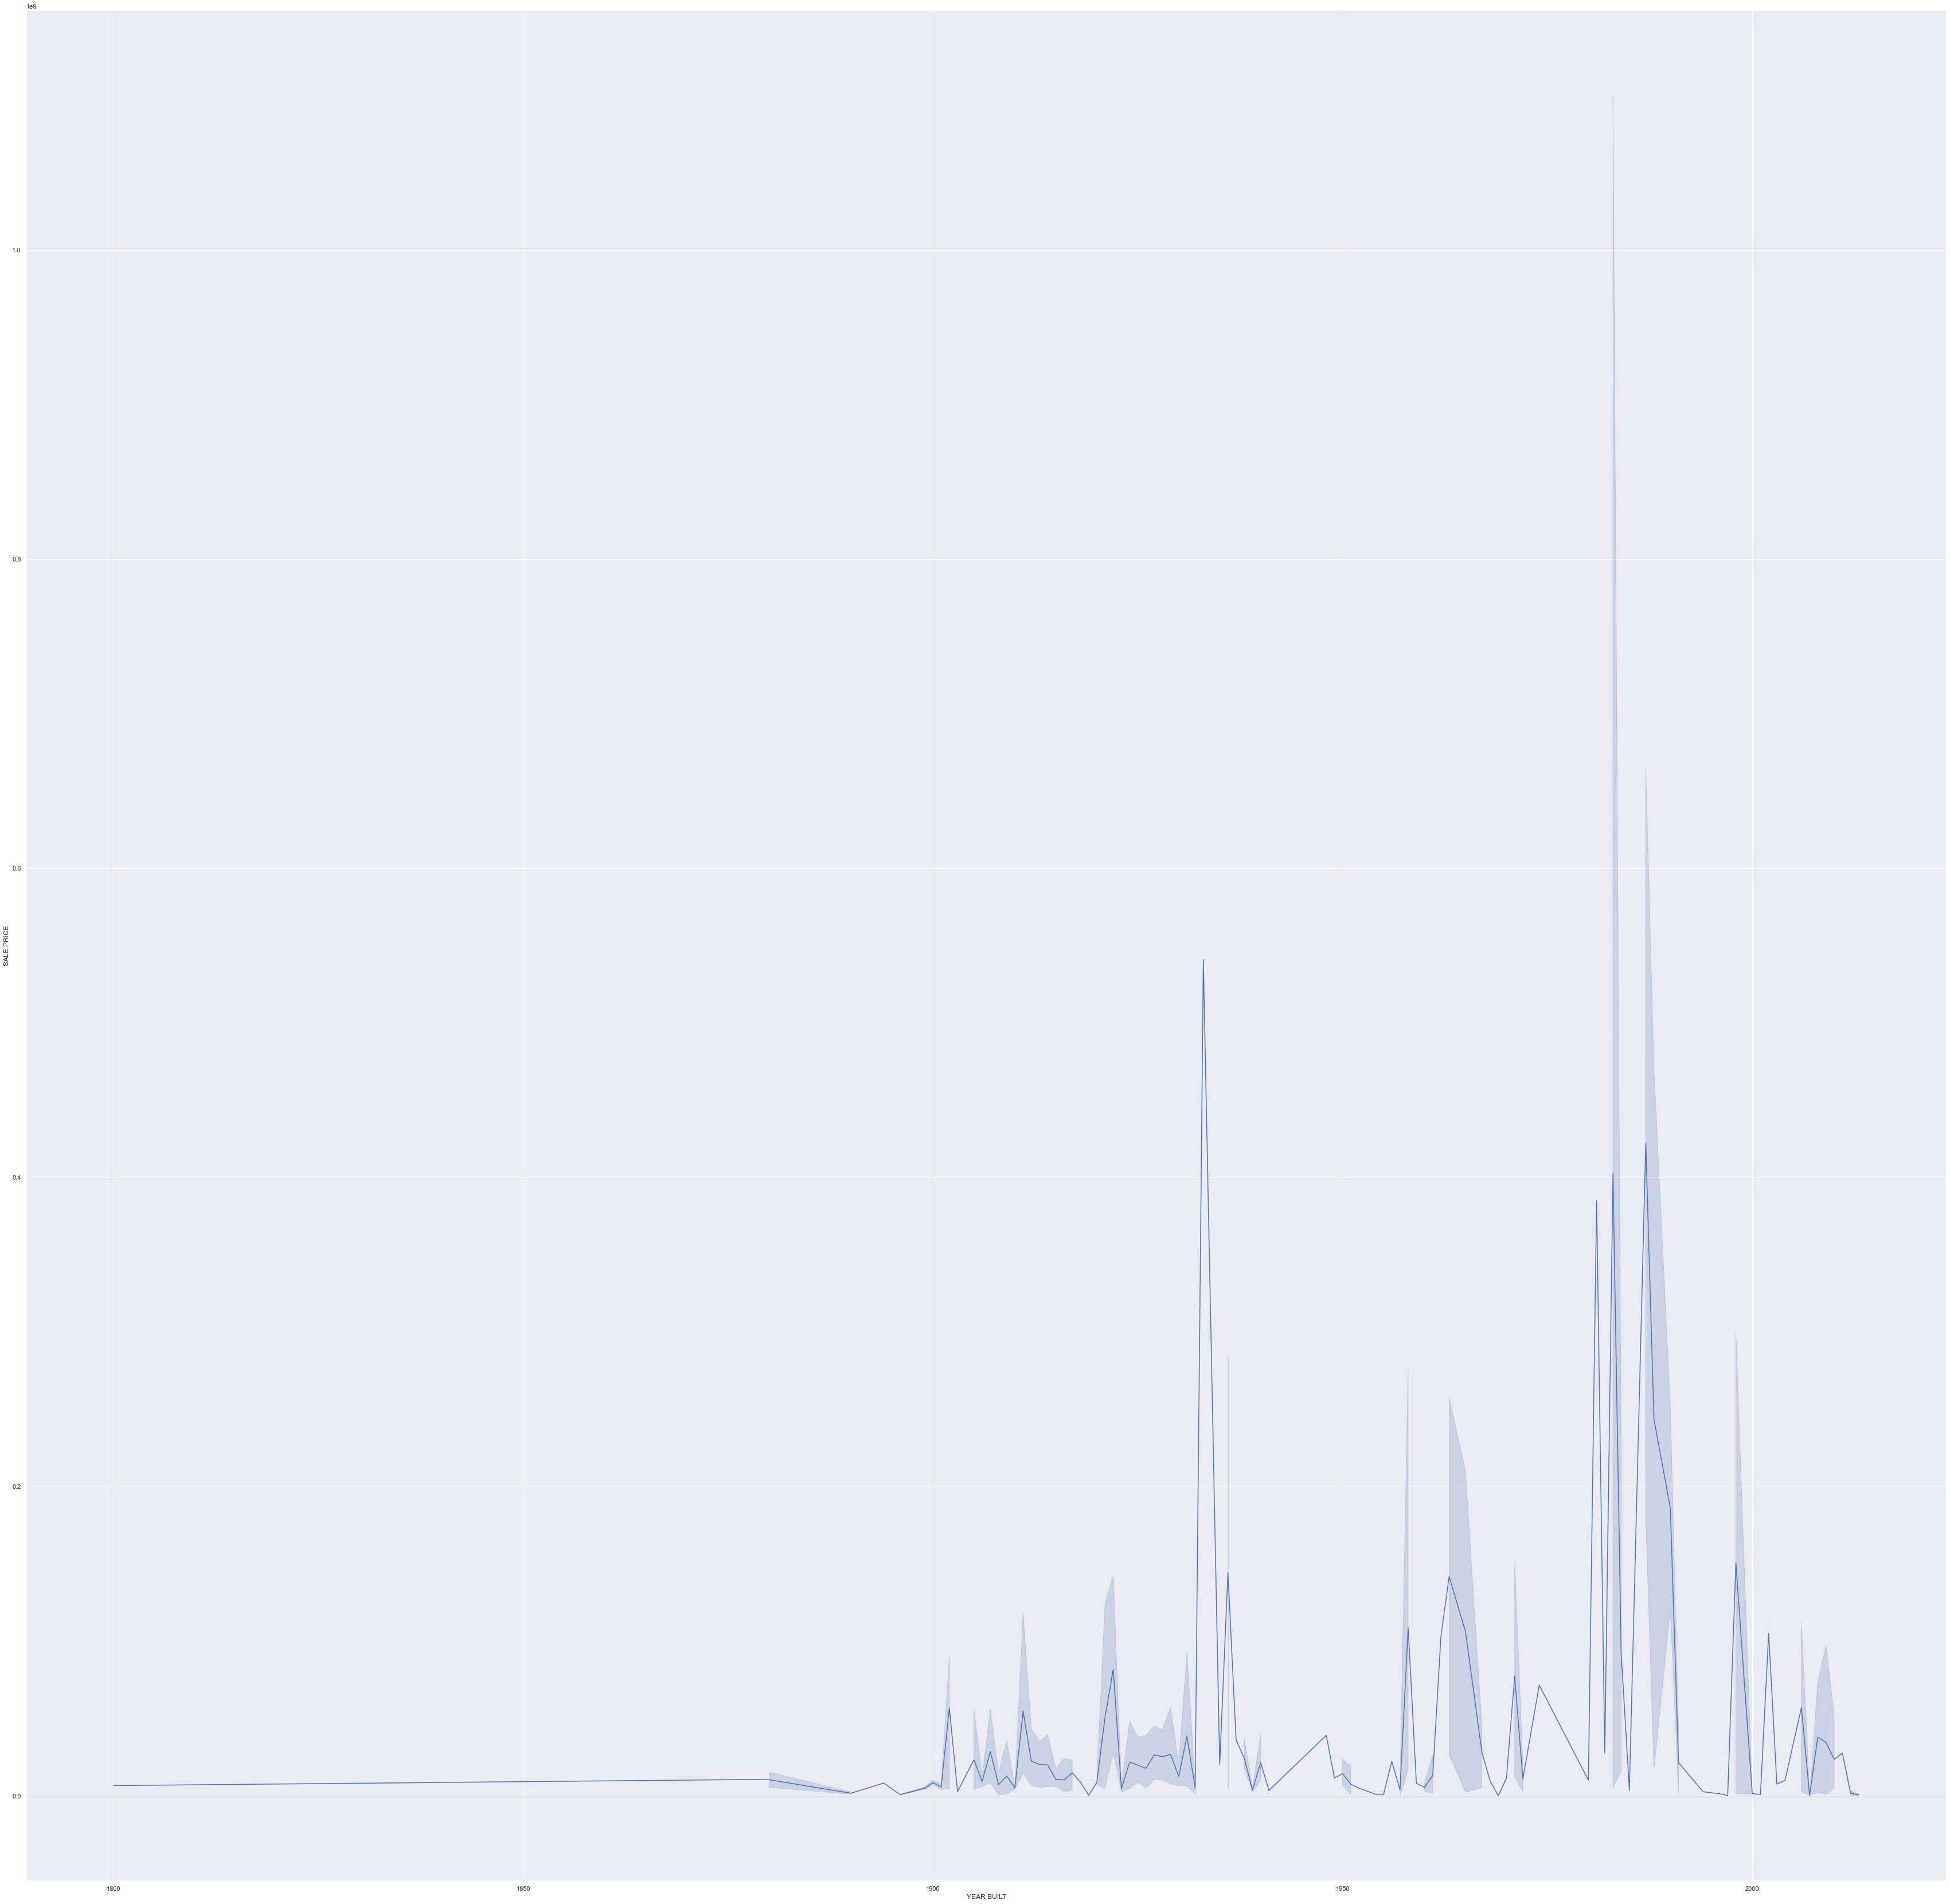

In [47]:
sns.lineplot(data=df_priceTimeAge, x="YEAR BUILT", y="SALE PRICE")

### <div class="alert alert-info">Show the scatter matrix plot and the correlation matrix</div>

In [49]:
df_neighbourhoodPrice

,NEIGHBORHOOD,SALE PRICE
Index,,
28,ALPHABETCITY,283.0
30,ALPHABETCITY,13185684.0
34,ALPHABETCITY,3810602.0
35,ALPHABETCITY,7333333.0
36,ALPHABETCITY,7333333.0
...,...,...
27061,WASHINGTONHEIGHTSUPPER,8620000.0
27063,WASHINGTONHEIGHTSUPPER,11400000.0
27064,WASHINGTONHEIGHTSUPPER,7810000.0


array([[<AxesSubplot:xlabel='LAND SQUARE FEET', ylabel='LAND SQUARE FEET'>,
        <AxesSubplot:xlabel='GROSS SQUARE FEET', ylabel='LAND SQUARE FEET'>,
        <AxesSubplot:xlabel='SALE PRICE', ylabel='LAND SQUARE FEET'>,
        <AxesSubplot:xlabel='YEAR BUILT', ylabel='LAND SQUARE FEET'>],
       [<AxesSubplot:xlabel='LAND SQUARE FEET', ylabel='GROSS SQUARE FEET'>,
        <AxesSubplot:xlabel='GROSS SQUARE FEET', ylabel='GROSS SQUARE FEET'>,
        <AxesSubplot:xlabel='SALE PRICE', ylabel='GROSS SQUARE FEET'>,
        <AxesSubplot:xlabel='YEAR BUILT', ylabel='GROSS SQUARE FEET'>],
       [<AxesSubplot:xlabel='LAND SQUARE FEET', ylabel='SALE PRICE'>,
        <AxesSubplot:xlabel='GROSS SQUARE FEET', ylabel='SALE PRICE'>,
        <AxesSubplot:xlabel='SALE PRICE', ylabel='SALE PRICE'>,
        <AxesSubplot:xlabel='YEAR BUILT', ylabel='SALE PRICE'>],
       [<AxesSubplot:xlabel='LAND SQUARE FEET', ylabel='YEAR BUILT'>,
        <AxesSubplot:xlabel='GROSS SQUARE FEET', ylabel='YEAR BUILT'

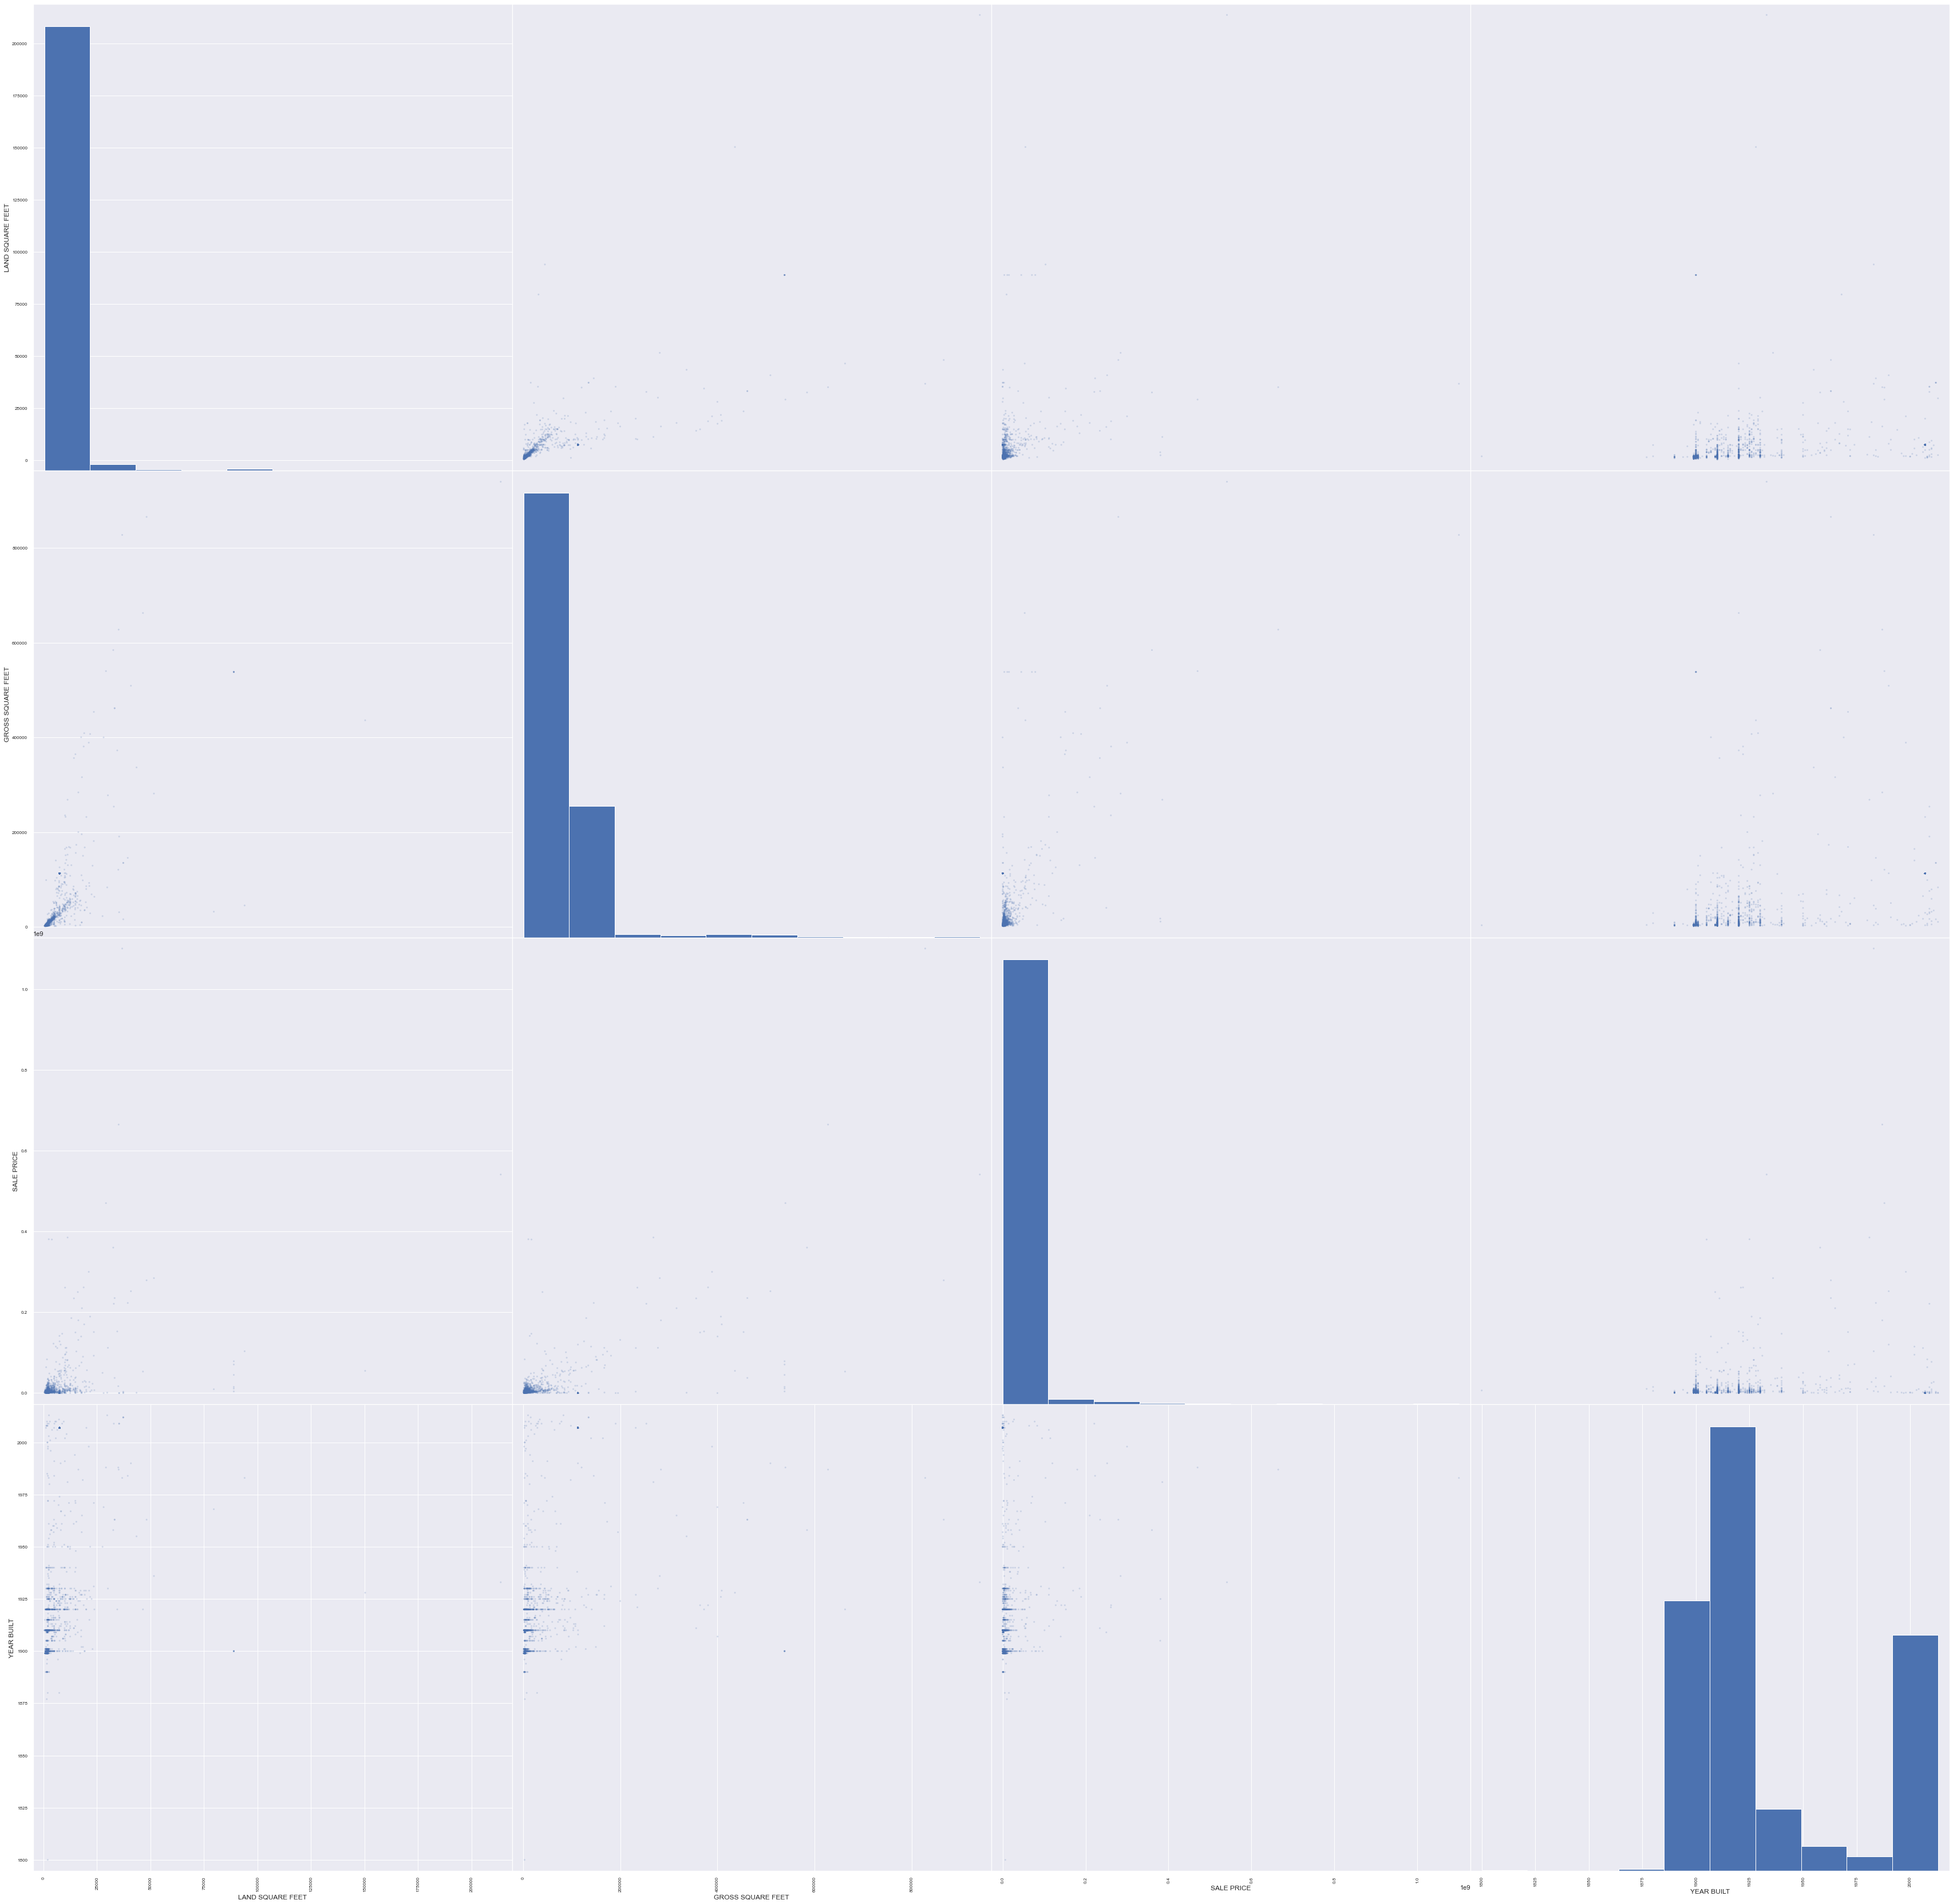

In [52]:
pd.plotting.scatter_matrix(df_numerical, alpha=0.2)

array([[<AxesSubplot:xlabel='YEAR BUILT', ylabel='YEAR BUILT'>,
        <AxesSubplot:xlabel='SALE PRICE', ylabel='YEAR BUILT'>],
       [<AxesSubplot:xlabel='YEAR BUILT', ylabel='SALE PRICE'>,
        <AxesSubplot:xlabel='SALE PRICE', ylabel='SALE PRICE'>]],
      dtype=object)

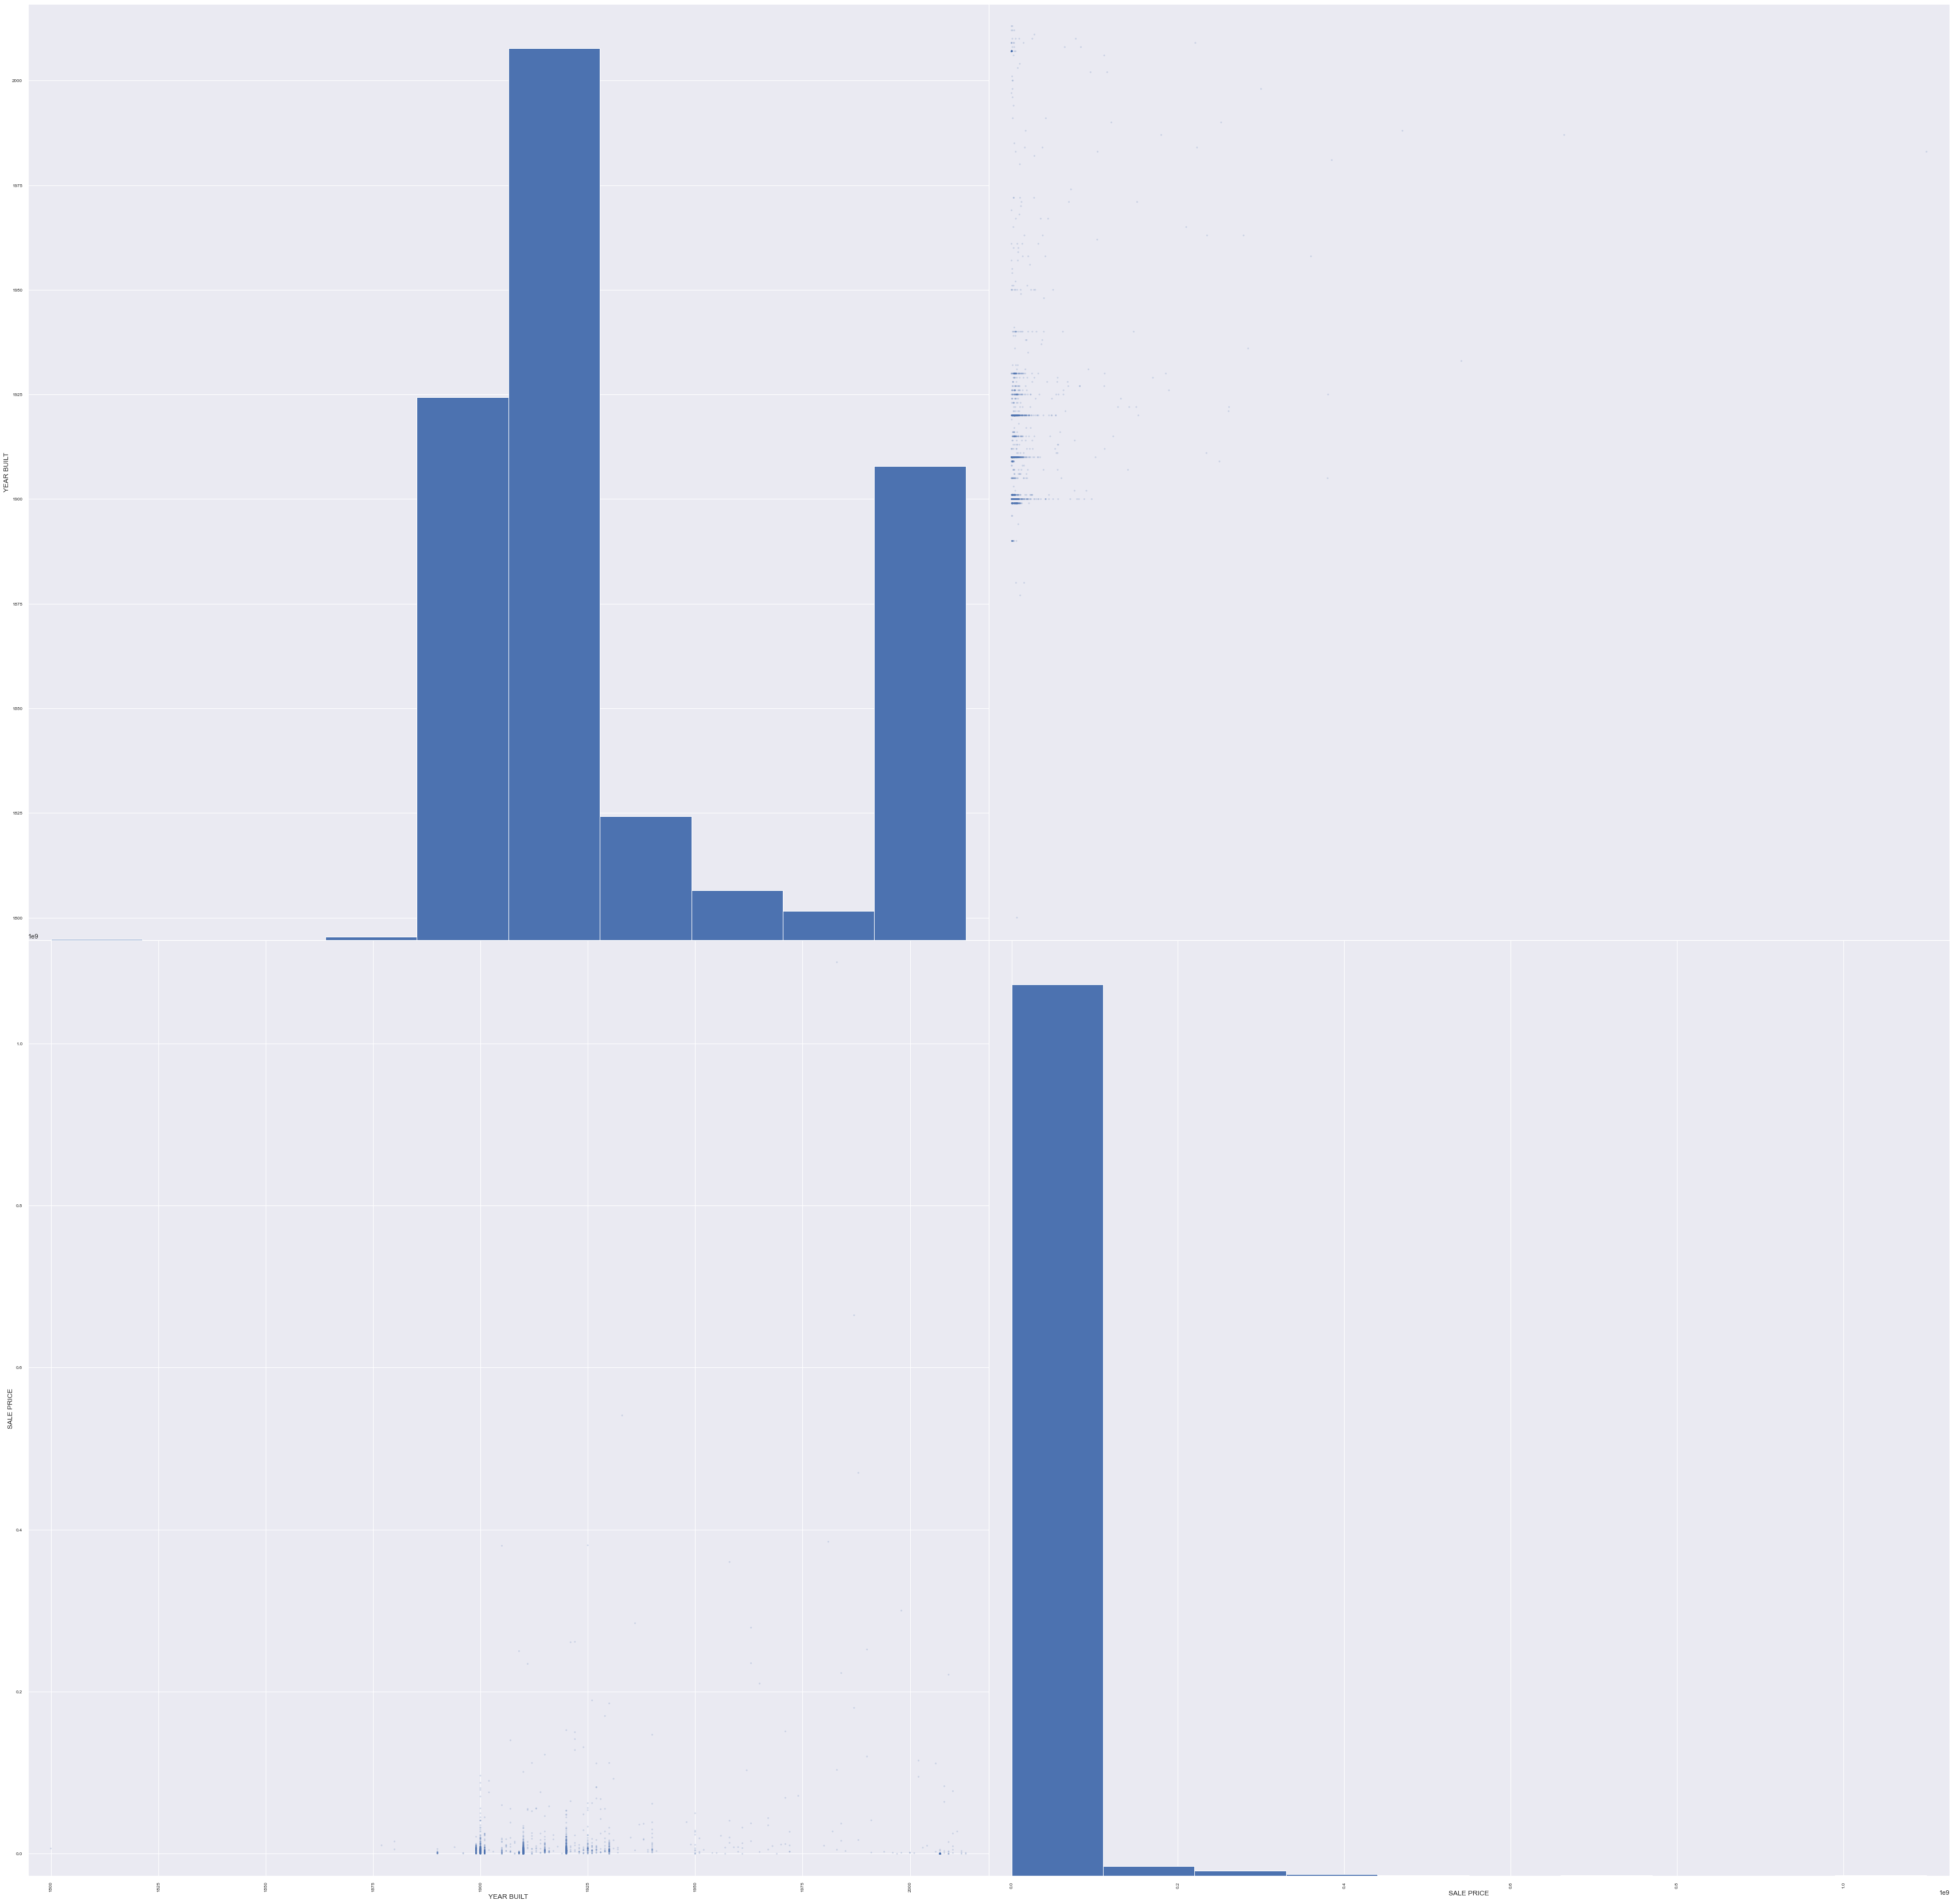

In [57]:
pd.plotting.scatter_matrix(df_priceTimeAge, alpha=0.2)

### <div class="alert alert-info">Any further plots, which demonstrate your understanding of the data</div>

## <font color=blue>3.Model building</font>

### <div class="alert alert-info">Select the predictors that would have impact in predicting house prices.</div>

In [60]:
df_numerical

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,YEAR BUILT
Index,,,,
22,2381.0,3084.0,3150000.0,1899.0
25,2426.0,9345.0,3650000.0,1900.0
26,2726.0,13002.0,895250.0,1910.0
28,2093.0,5852.0,283.0,1997.0
29,2164.0,9071.0,3500000.0,1900.0
...,...,...,...,...
27379,7900.0,6438.0,7300000.0,1925.0
27380,10000.0,20000.0,1500000.0,1991.0
27382,17275.0,34570.0,5183000.0,1927.0


In [61]:
df_categorical

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,BUILDING CLASS AT TIME OF SALE,TAX CLASS AT TIME OF SALE,BLOCK,ZIP CODE,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE DATE
Index,,,,,,,,,,,,,,
24,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2B,C7,303EAST4THSTREET,C7,2,374,10009,1,8,2,10,2013-05-02
28,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2B,C7,17AVENUEB,C7,2,385,10009,1,7,1,8,2013-04-18
30,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2,C7,14AVENUEB,C7,2,397,10009,33,25,2,27,2013-01-31
31,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2B,C7,174EAST2NDSTREET,C7,2,398,10009,52,9,1,10,2013-07-01
32,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2B,C7,174EAST2NDSTREET,C7,2,398,10009,52,9,1,10,2012-10-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27063,WASHINGTONHEIGHTSUPPER,07RENTALS-WALKUPAPARTMENTS,2,C7,4321BROADWAY,C7,2,2180,10033,120,69,5,74,2013-11-04
27064,WASHINGTONHEIGHTSUPPER,08RENTALS-ELEVATORAPARTMENTS,2,D7,440AUDUBONAVENUE,D7,2,2158,10040,16,68,3,71,2012-08-29
27067,WASHINGTONHEIGHTSUPPER,08RENTALS-ELEVATORAPARTMENTS,2,D7,100ARDENSTREET,D7,2,2175,10040,27,55,8,63,2012-03-12


In [66]:
# Select the predictors (features) and the target variable (house prices)
# Replace 'feature_1', 'feature_2', etc. with the actual column names of your dataset
predictors = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT']
target = 'SALE PRICE'

X = df_numerical[predictors]
y = df_numerical[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
# Define the cross-validation procedure
k = 10  # The number of folds; you can change this value depending on your dataset size and problem complexity
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Use mean squared error as the scoring metric
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Evaluate the model using cross-validation
mse_scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)

# Calculate the mean and standard deviation of the MSE scores
mse_mean = -np.mean(mse_scores)
mse_std = np.std(mse_scores)

print(f"Mean Squared Error (MSE) with {k}-fold cross-validation: {mse_mean:.2f} (+/- {mse_std:.2f})")

Mean Squared Error (MSE) with 10-fold cross-validation: 1315757183455411.50 (+/- 831307451491182.12)


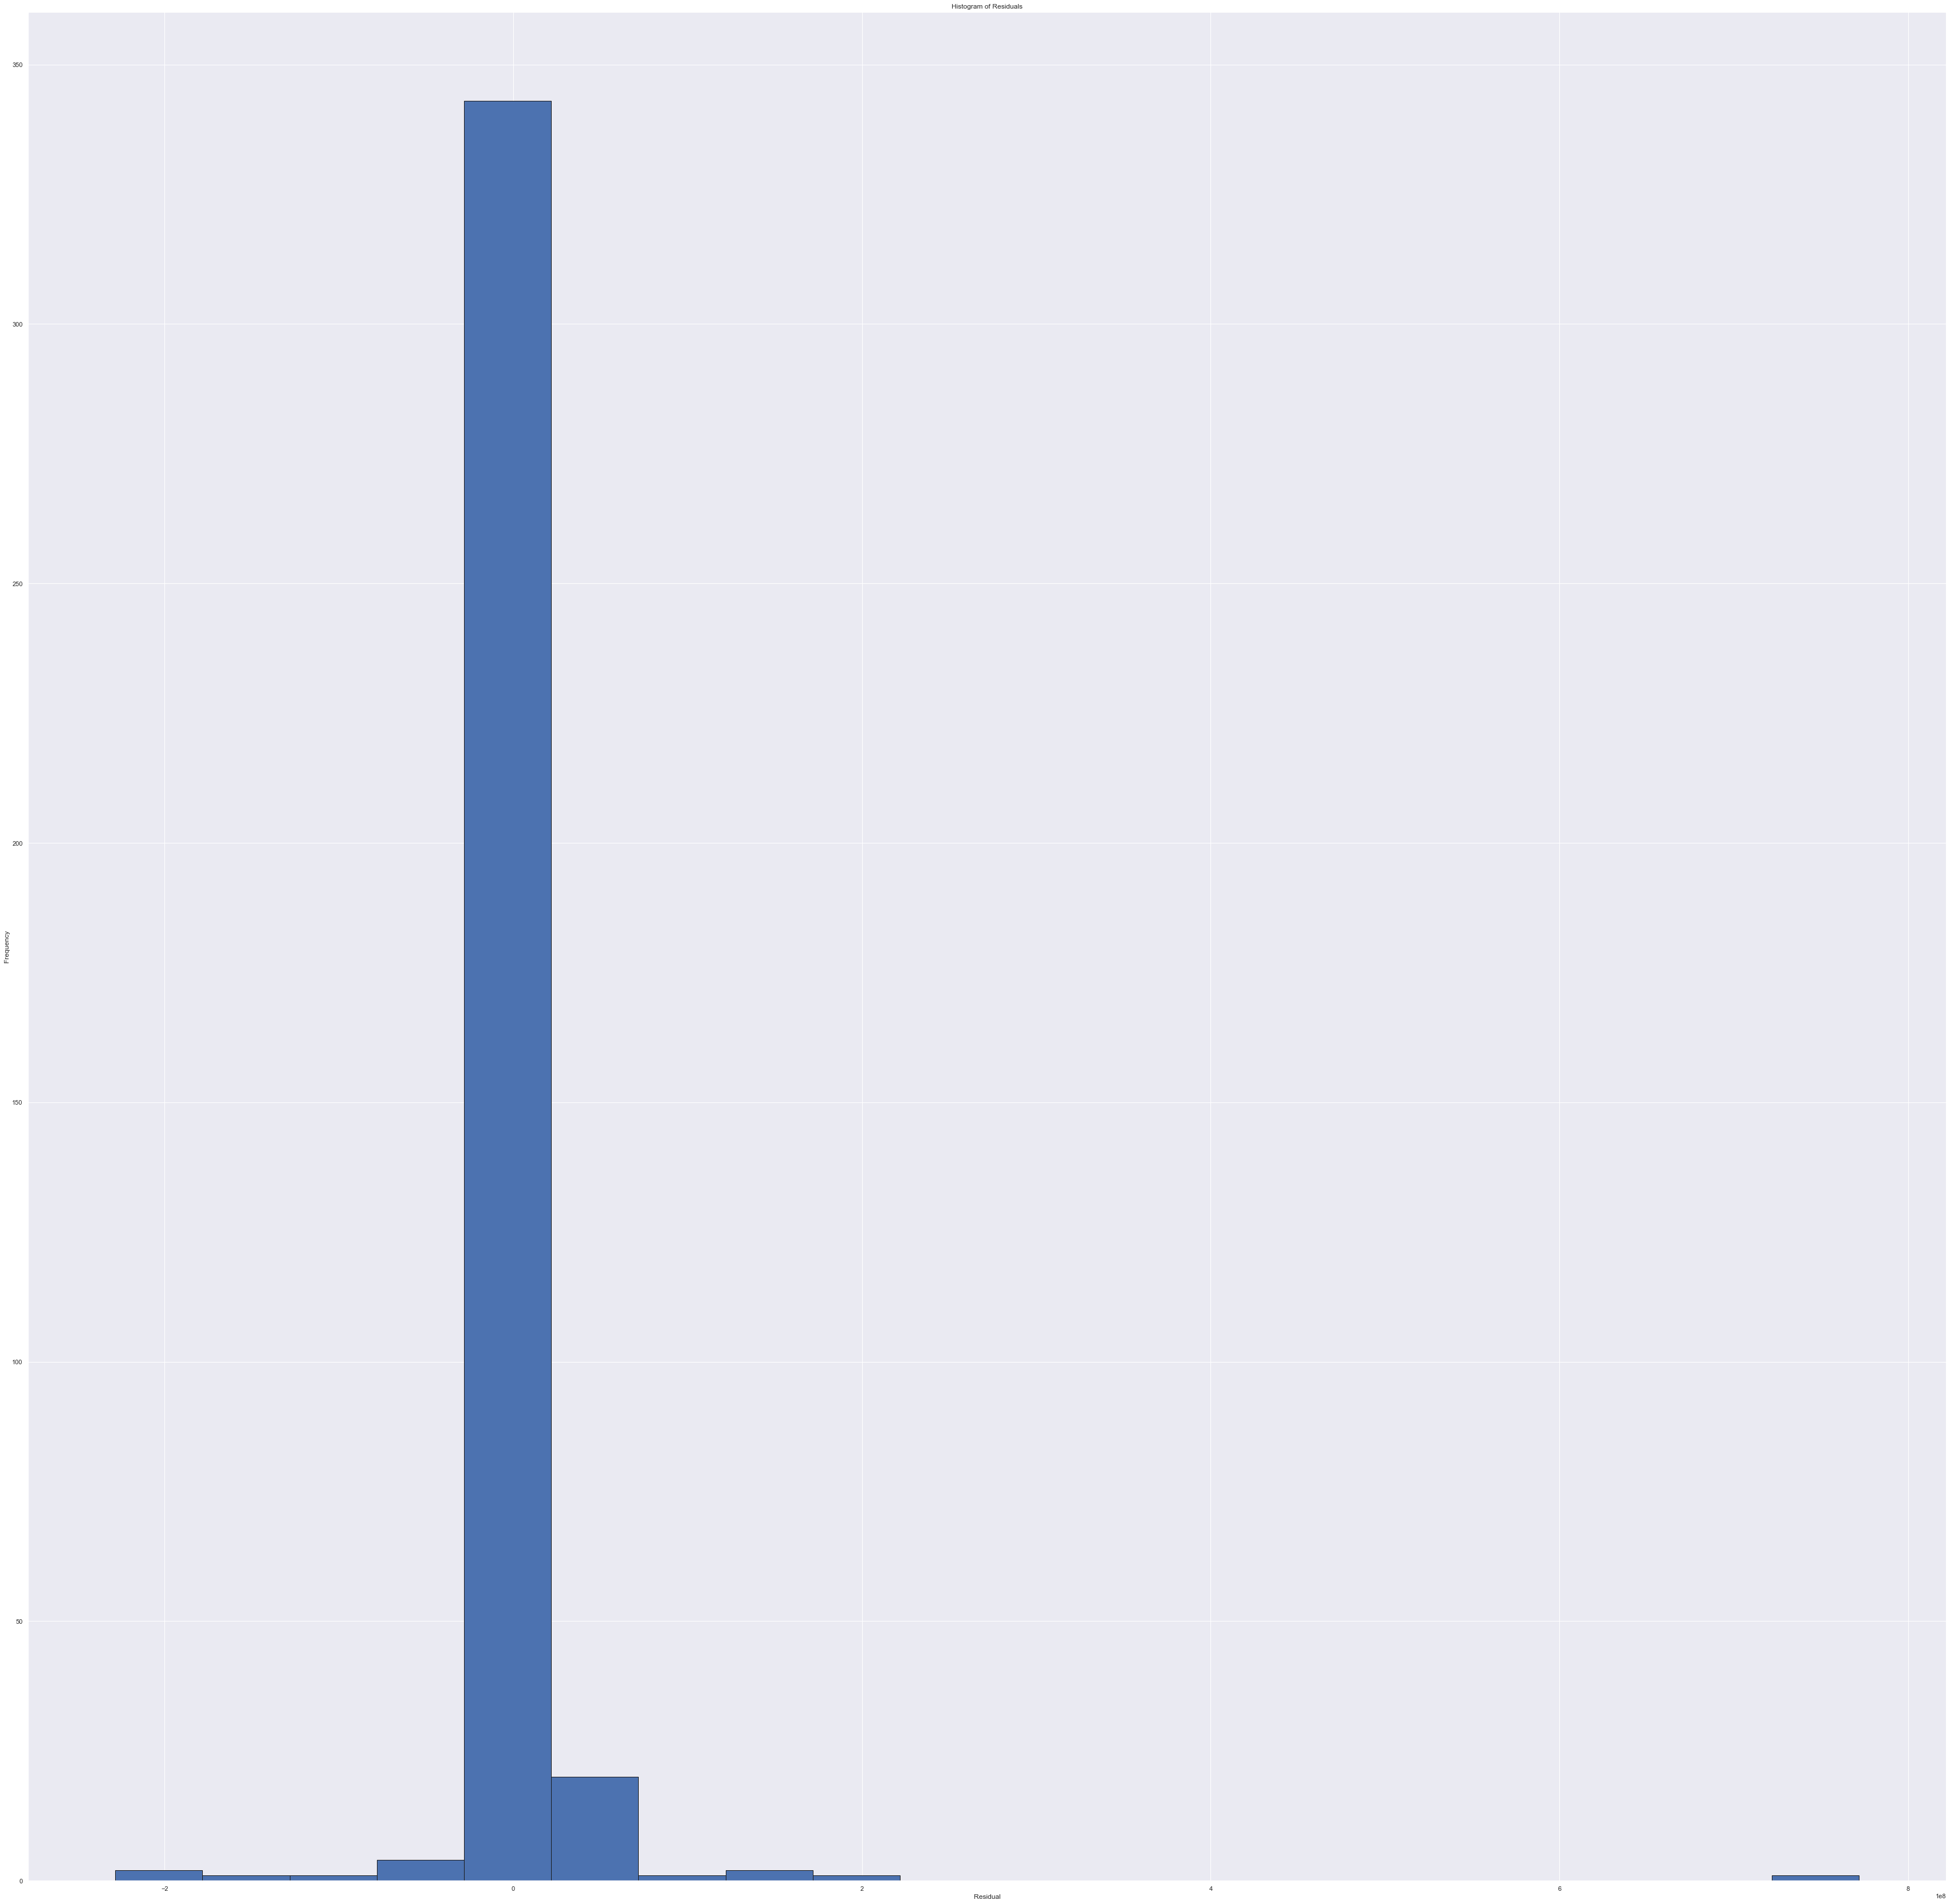

In [67]:
# Calculate the residuals
residuals = y_test - y_pred

# Plot the histogram of the residuals
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

### <div class="alert alert-info">Build up a first linear model with appropriate predictors and evaluate it. Split the data into a training and test sets; build up the model; and then show a histogram of the residuals. Evaluate your model by using a cross-validation procedure.</div>

# <font color=green>Part 2 - Improved model</font>

### <div class="alert alert-warning">1. Consider the entire datasets given in this assignment. Develop an improved predictive model that predicts the sales prices of houses. Make sure to validate your model. You should aim for a model with a higher performance while using a maximum of data points. This implies treating missing values differently for example through imputation rather than dropping them.</div>

### <div class="alert alert-warning">2. Use the K-Means algorithm to cluster your cleansed dataset and compare the obtained clusters with the distribution found in the data. Justify your clustering and visualise your clusters as appropriate.</div>

### <div class="alert alert-warning">3. Build up local regressors based on your clustering and discuss how this clusters-based regression compares to your regression model obtained in Part 2. 1.</div>